In [8]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('C:/Users/Acer/Downloads/reddit_vm.csv')
data.head(10)

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28
5,Canada: Oxford-AstraZeneca vaccine approval ex...,5,lftbji,https://www.canadaforums.ca/2021/02/canada-oxf...,0,1.612869e+09,NaN,2021-02-09 13:17:11
6,Comment,1,ej9x066,NaN,0,1.553474e+09,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53
7,Fuck you anti-vaxxing retards,10,g6jkhp,https://www.reddit.com/r/VaccineMyths/comments...,8,1.587663e+09,https://youtu.be/zBkVCpbNnkU,2020-04-23 20:23:42
8,Comment,0,fofa0yy,NaN,0,1.587760e+09,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50
9,Comment,0,ej9xuaf,NaN,0,1.553475e+09,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1513 non-null   object 
 1   score      1513 non-null   int64  
 2   id         1513 non-null   object 
 3   url        452 non-null    object 
 4   comms_num  1513 non-null   int64  
 5   created    1513 non-null   float64
 6   body       1147 non-null   object 
 7   timestamp  1513 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 94.7+ KB


In [11]:
data = data.replace({'Not Available': np.nan})
for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)
    
data.describe()

,score,comms_num,created
count,1513.000000,1513.000000,1.513000e+03
mean,3.741573,1.904825,1.542470e+09
std,30.847937,16.586559,7.020069e+07
min,-12.000000,0.000000,1.389624e+09
25%,1.000000,0.000000,1.553943e+09
50%,1.000000,0.000000,1.568623e+09
75%,3.000000,1.000000,1.580725e+09
max,1190.000000,596.000000,1.620049e+09


In [12]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [13]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
url,1061,70.1
body,366,24.2


In [14]:
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.
We will remove 1 columns.


In [15]:
data = data.drop(columns = list(missing_columns))

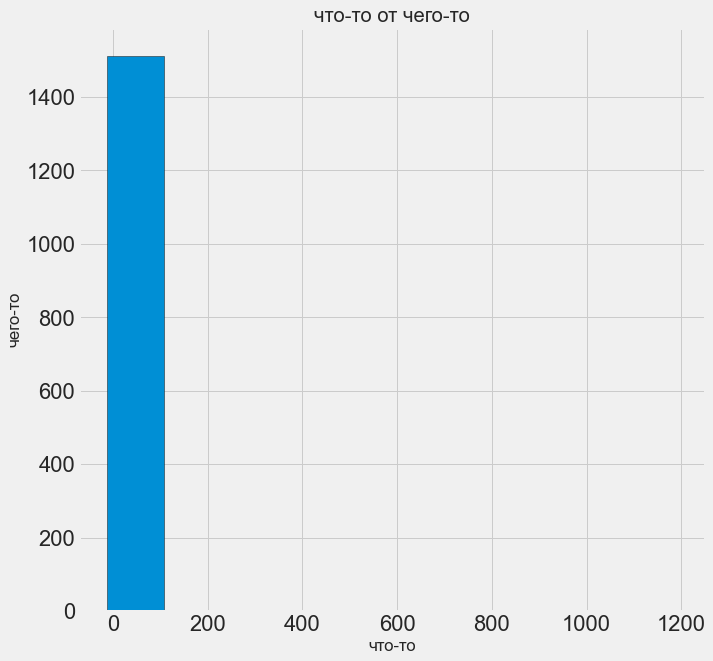

In [49]:
figsize(10, 10)

data = data.rename(columns = {'что-то от чего-то': 'что-то'})

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('что-то'); plt.ylabel('чего-то'); 
plt.title('что-то от чего-то');

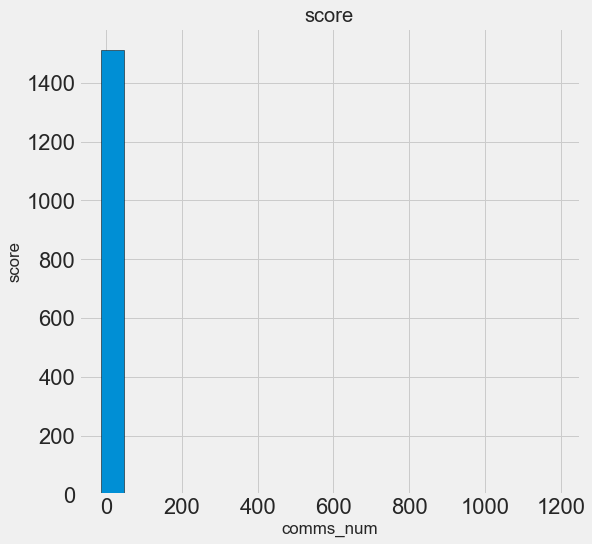

In [51]:
figsize(8, 8)
plt.hist(data['score'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('comms_num'); 
plt.ylabel('score'); plt.title('score');

In [52]:
data['score'].describe()

count    1513.000000
mean        3.741573
std        30.847937
min       -12.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1190.000000
Name: score, dtype: float64

In [53]:
data['score'].dropna().sort_values().tail(10)

254      25
418      25
142      27
375      28
211      29
185      30
200      37
116      38
420      44
422    1190
Name: score, dtype: int64

In [67]:
features = data.copy()

numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = data[['title', 'id']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(1513, 1971)

In [72]:
сложновато, но очень интересно(

SyntaxError: invalid syntax (<ipython-input-72-26ef62b9b3cf>, line 1)